In [1]:
include("src/pkgs.jl")

#using PyPlot
#using Pipe
using Gadfly
using FreqTables
using DataFrames

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Tricks ────────────────────── v0.1.6
   Installed Calculus ──────────────────── v0.5.1
   Installed Crayons ───────────────────── v4.1.1
   Installed IrrationalConstants ───────── v0.1.1
   Installed Showoff ───────────────────── v1.0.3
   Installed Scratch ───────────────────── v1.1.0
   Installed ColorTypes ────────────────── v0.11.3
   Installed FreqTables ────────────────── v0.4.5
   Installed Adapt ─────────────────────── v3.3.3
   Installed OffsetArrays ──────────────── v1.12.1
   Installed DualNumbers ───────────────── v0.6.8
   Installed HypergeometricFunctions ───── v0.3.10
   Installed Rmath ─────────────────────── v0.7.0
   Installed NamedArrays ───────────────── v0.9.6
   Installed StatsFuns ─────────────────── v1.0.1
   Installed FFTW ──────────────────────── v1.4.6
   Installed IterTools ─────────────────── v1.4.0
   Installed TableTraits ───────────────── v1.0.1
   I

In [2]:
include("src/riot.jl")
using Main.Riot

In [14]:
leagues = ["challenger"]
leagues = ["challenger", "grandmaster"]
length(map(scrape_league, leagues))

Loading https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/a8N4PtgE7K0z-om0aAOW2OU8-Uc0FAlk2rU09LR8tjek52Iq7J_2QDGDz-MIwi0p3SjeKfjxQLR7_A/ids -> cache/get-2f06a815418eedd0ae61e1540070009e.json
Loading https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/CrOb-8e57kaQxYNx8mYskZNCFpSGCKr9LjGg-ypLItVuvCKASEOg03CZsCrV38W4wSDqkseaKgLynQ/ids -> cache/get-a3be72288f664f42c2c9888898f9b419.json
Loading https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/9JWN0m3XbW0BZJJ0W3m9yoxisGptJKffsoc0CSrVzhx3rnb77JmPP45NSEtamu5CmXgcw8PmanKuLQ/ids -> cache/get-84e55f217bdb5c5c02e630e08f57a11a.json
Loading https://americas.api.riotgames.com/tft/match/v1/matches/NA1_4324017956 -> cache/match-4c2eef9ca6ec6a59a3181fe8961110ed.json
Loading https://americas.api.riotgames.com/tft/match/v1/matches/by-puuid/radrh3t0f-vNIwIzSz2BV2b4aCcbEf8Iq-UtW6qs8zSoTE4S8UOkj5ajEB0qAeQ3ESHBD7a0myiphQ/ids -> cache/get-562c2c86272c2caf0b4356b2c893a8fb.json
Loading https://americas.api.riotgames.c

LoadError: HTTP.ExceptionRequest.StatusError(429, "GET", "/tft/match/v1/matches/NA1_4323482756", HTTP.Messages.Response:
"""
HTTP/1.1 429 Too Many Requests
Date: Mon, 30 May 2022 00:39:27 GMT
Content-Type: application/json;charset=utf-8
Transfer-Encoding: chunked
Connection: keep-alive
Retry-After: 2
X-App-Rate-Limit: 20:1,100:120
X-App-Rate-Limit-Count: 1:1,101:120
X-Method-Rate-Limit: 200:10
X-Method-Rate-Limit-Count: 6:10
X-Rate-Limit-Type: application
X-Riot-Edge-Trace-Id: 3dde1d59-946d-4476-9ddb-c501a88e4ca5

{"status":{"message":"Rate limit exceeded","status_code":429}}""")

In [15]:
rd = matches_df()

Main.Riot.RiotData(58624×6 DataFrame
   Row │ Placement  Level  DamageToPlayers  LastRound  MatchID         PUUID   ⋯
       │ Int64      Int64  Int64            Int64      String          String  ⋯
───────┼────────────────────────────────────────────────────────────────────────
     1 │         2      8              159         35  NA1_4311576993  R9-HCYN ⋯
     2 │         5      9               82         30  NA1_4311576993  KpzadE2
     3 │         1      8              167         35  NA1_4311576993  GMjvt6E
     4 │         6      8               71         28  NA1_4311576993  6qcMBES
     5 │         7      8               69         28  NA1_4311576993  42jLPfs ⋯
     6 │         4      8               96         31  NA1_4311576993  Sofvtkx
     7 │         3      9              102         33  NA1_4311576993  UYUC--K
     8 │         8      8               46         26  NA1_4311576993  YudpBvb
     9 │         1      9              171         37  NA1_4316885995  2ZuOR62 ⋯
   

In [16]:
Gadfly.push_theme(:dark)
set_default_plot_size(36cm, 15cm)

function plot_freq(df::DataFrame, col::Symbol, ptitle, rev=true, limit=50)
    ft = freqtable(df, col)
    df = DataFrame(Label = names(ft)[1], Freq = ft)
    sort!(df, [:Freq], rev=rev)
    df = first(df, limit)
    p = plot(df, x=:Label, y=:Freq, Geom.bar(position=:dodge))
    title(hstack(p), ptitle)
end

win_filter = r -> 0 < r.Placement <= 3

#13 (generic function with 1 method)

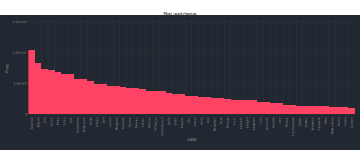

In [17]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :CharacterID, "Most used champs")

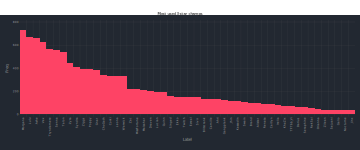

In [18]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 3, data)

plot_freq(data, :CharacterID, "Most used 3 star champs")

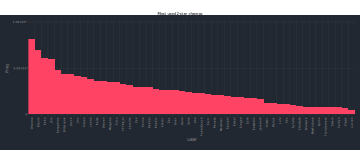

In [19]:
data = innerjoin(rd.units, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.Tier == 2, data)

plot_freq(data, :CharacterID, "Most used 2 star champs")

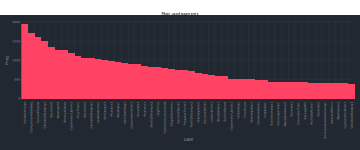

In [20]:
data = innerjoin(rd.augments, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Augment, "Most used augments")

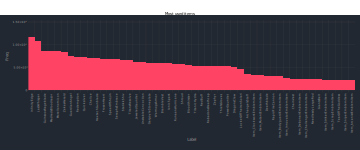

In [21]:
data = innerjoin(rd.items, rd.participants, on = [:MatchID, :PUUID])
data = filter(win_filter, data)

plot_freq(data, :Item, "Most used items")

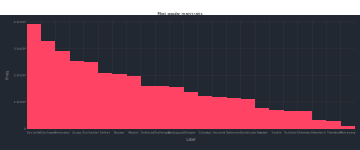

In [22]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent >= r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular main traits")

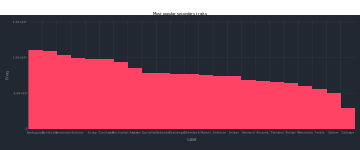

In [23]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierCurrent < r.TierTotal/2 && r.TierTotal > 1, data)

plot_freq(data, :Trait, "Most popular secondary traits")

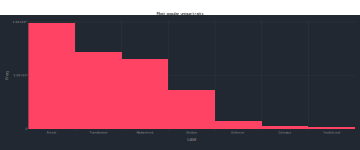

In [24]:
data = innerjoin(rd.traits, rd.participants, on = [:MatchID, :PUUID])
data = filter(r-> win_filter(r) && r.TierTotal == 1 , data)

plot_freq(data, :Trait, "Most popular unique traits")